In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
today = "%s" % datetime.date.today()

In [3]:
rich_fines = pd.read_csv("target/%s/rich_fines.csv" % today)
rich_fines['rented_on'] = pd.to_datetime(rich_fines.rented_on)
rich_fines.head()

,fine_id,fine_amount,fine_registered_at,rent_id,rented_on,car_id,car_reg_number,car_make,car_model,user_id,user_name,user_passport_no,user_birth_date,user_driving_permit_since
0,1,100,2017-10-01 18:39:00,4,2017-10-01,41,М902ТО33,bmw,series_2,247,Прасковья Петрова,378580244,1982-09-14,1992-05-13
1,2,179,2017-10-01 14:50:00,7,2017-10-01,78,К420АМ61,nissan,murano,560,Добрыня Попов,555806492,1994-03-18,1998-10-01
2,3,332,2017-10-01 11:43:00,11,2017-10-01,34,В877ОО31,nissan,murano,99,Ираида Лыкова,105795662,1994-10-12,1998-03-26
3,4,390,2017-10-01 17:44:00,12,2017-10-01,69,Р090СВ72,bmw,series_2,429,Авдей Минин,132109465,1990-06-21,1992-01-07
4,5,369,2017-10-01 06:55:00,12,2017-10-01,69,Р090СВ72,bmw,series_2,429,Авдей Минин,132109465,1990-06-21,1992-01-07


In [4]:
rich_fines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 14 columns):
fine_id                      1296 non-null int64
fine_amount                  1296 non-null int64
fine_registered_at           1296 non-null object
rent_id                      1296 non-null int64
rented_on                    1296 non-null datetime64[ns]
car_id                       1296 non-null int64
car_reg_number               1296 non-null object
car_make                     1296 non-null object
car_model                    1296 non-null object
user_id                      1296 non-null int64
user_name                    1296 non-null object
user_passport_no             1296 non-null int64
user_birth_date              1296 non-null object
user_driving_permit_since    1296 non-null object
dtypes: datetime64[ns](1), int64(6), object(7)
memory usage: 141.8+ KB


In [5]:
(rich_fines
 .groupby(['user_passport_no', 'user_name'])['fine_amount']
 .apply(lambda group: pd.Series([group.sum(), len(group)], index=['fine_amount', 'fine_count']))
 .unstack()
 .reset_index()
 .sort_values(by='fine_amount', ascending=False)
 )

,user_passport_no,user_name,fine_amount,fine_count
27,43538731,Христофор Елизаров,3462,10
245,486206382,Злата Кузнецова,3416,11
465,895291707,Ираида Иванова,2957,7
314,592951432,Варлам Минин,2678,10
216,445643927,Агафья Иванова,2614,8
451,874931848,Ульяна Черная,2553,8
61,111379049,Варлам Елизаров,2482,6
291,556568372,Прасковья Васильева,2351,4
298,565139076,Алевтина Кузнецова,2329,7
223,455970655,Василиса Грибова,2194,9


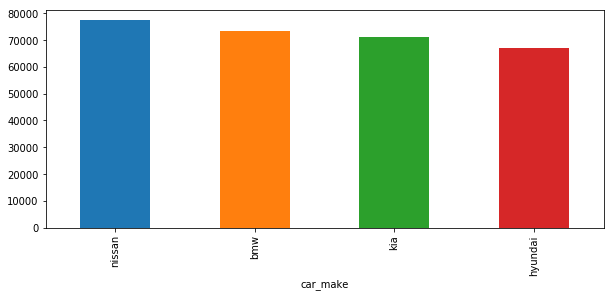

In [6]:
(rich_fines
 .groupby('car_make')['fine_amount']
 .apply(lambda group: pd.Series([group.sum(), len(group)], index=['fine_amount', 'fine_count']))
 .unstack()
 .reset_index()
 .sort_values(by='fine_amount', ascending=False)
 .pipe(lambda df: df.set_index('car_make'))
 .fine_amount.plot(kind='bar', figsize=(10, 4))
)

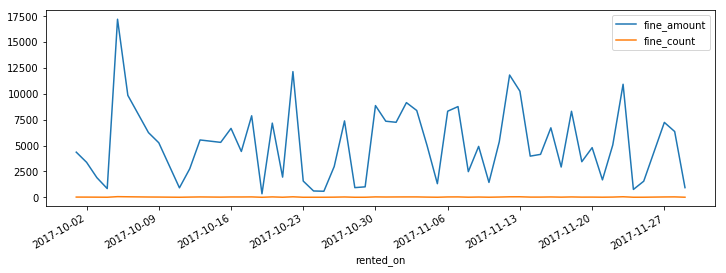

In [7]:
(rich_fines
 .groupby('rented_on')['fine_amount']
 .apply(lambda group: pd.Series([group.sum(), len(group)], index=['fine_amount', 'fine_count']))
 .unstack()
 .reset_index()
 .sort_values(by='rented_on', ascending=False)
 .set_index('rented_on')
 .plot(figsize=(12,4))
)